#Görev 1 : Keşifçi Veri Analizi

##Adım 1: Genel resmi inceleyiniz.

In [ ]:
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [ ]:
from google.colab import drive
drive.mount("/gdrive")
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
df = pd.read_csv("/gdrive/MyDrive/Miuul/2-Feature Engineering/Case_Study/diabetes.csv")

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


-Min değeri 0 olanlara bakılmalı (Outcome hariç) BMI gibi değerlerin 0 olması yanlış bir durum olduğunun göstergesidir.

##Adım 2: Numerik ve kategorik değişkenleri yakalayınız.

In [ ]:
df["Pregnancies"].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [ ]:
cat_cols = [col for col in df.columns if 20 > df[col].nunique() >= 2]

In [ ]:
cat_cols

['Pregnancies', 'Outcome']

In [ ]:
num_cols = [col for col in df.columns if col not in cat_cols]

In [ ]:
num_cols

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

##Adım 3:  Numerik ve kategorik değişkenlerin analizini yapınız.

In [ ]:
df[cat_cols]

,Pregnancies,Outcome
0,6,1
1,1,0
2,8,1
3,1,0
4,0,1
...,...,...
763,10,0
764,2,0
765,5,0
766,1,1


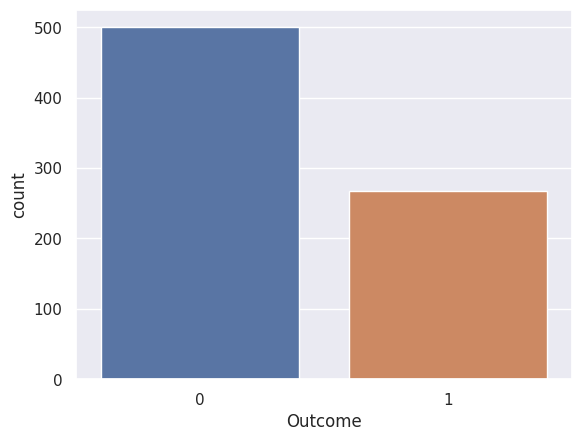

In [ ]:
sns.countplot(x = df["Outcome"], data = df)
plt.show()

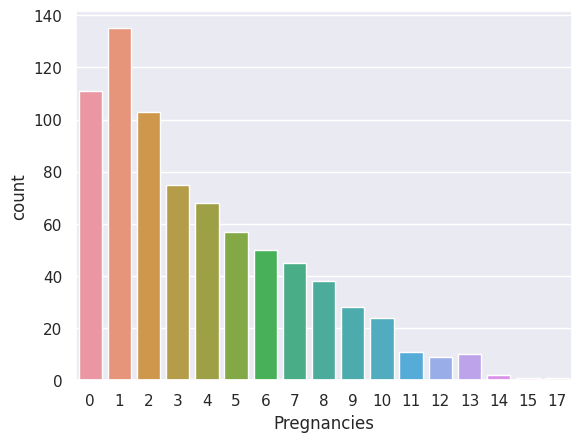

In [ ]:
sns.countplot(x = df["Pregnancies"], data = df)
plt.show()

In [ ]:
df["Pregnancies"].value_counts() / df.shape[0] * 100

1     17.578125
0     14.453125
2     13.411458
3      9.765625
4      8.854167
5      7.421875
6      6.510417
7      5.859375
8      4.947917
9      3.645833
10     3.125000
11     1.432292
13     1.302083
12     1.171875
14     0.260417
15     0.130208
17     0.130208
Name: Pregnancies, dtype: float64

--------

In [ ]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


-Insulin değerinde bir outlier durumu var gibi ****

-BloodPressure değişkenindede bi kontrol gerekli.

-Pregnancies değişkenindede aynı durum çok şokomelli.

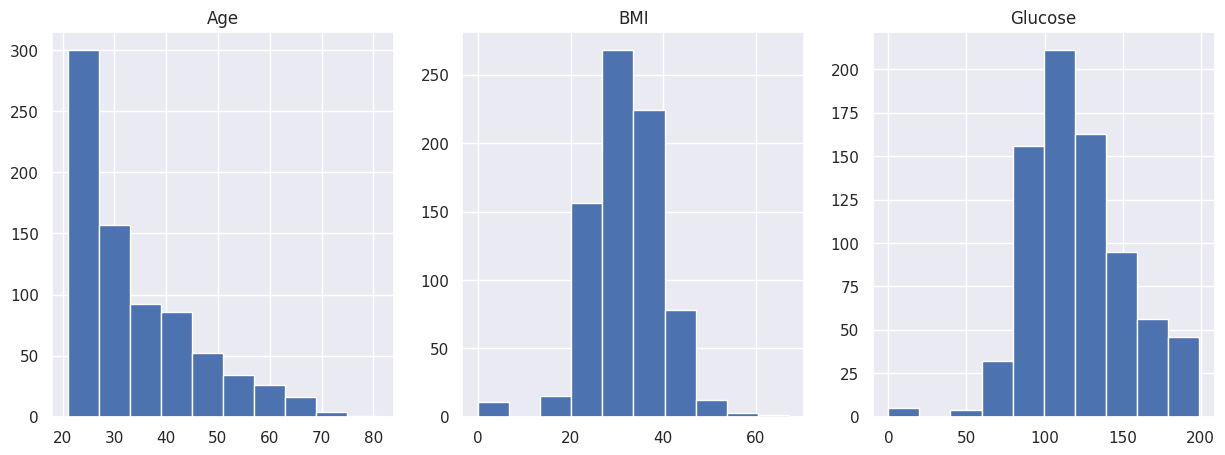

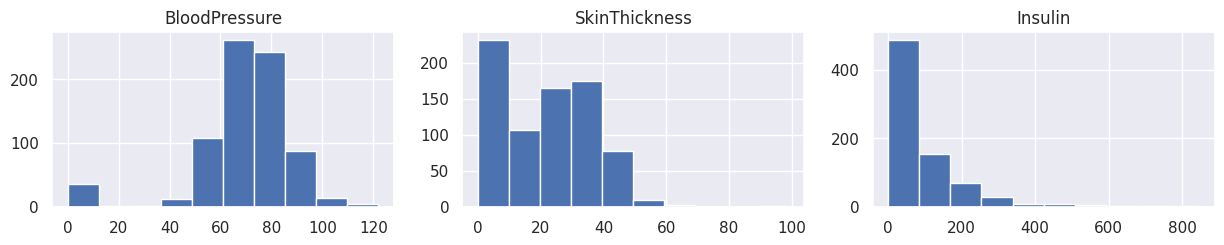

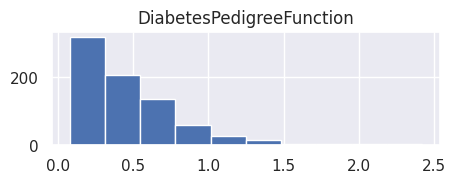

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title("Age")
plt.hist(df["Age"])

plt.subplot(1,3,2)
plt.title("BMI")
plt.hist(df["BMI"])

plt.subplot(1,3,3)
plt.title("Glucose")
plt.hist(df["Glucose"])
plt.show()

plt.figure(figsize=(15,5))
plt.subplot(2,3,1)
plt.title("BloodPressure")
plt.hist(df["BloodPressure"])

plt.subplot(2,3,2)
plt.title("SkinThickness")
plt.hist(df["SkinThickness"])

plt.subplot(2,3,3)
plt.title("Insulin")
plt.hist(df["Insulin"])
plt.show()

plt.figure(figsize=(5,5))
plt.subplot(3,1,1)
plt.title("DiabetesPedigreeFunction")
plt.hist(df["DiabetesPedigreeFunction"])
plt.show()


##Adım 4:Hedef değişken analizi yapınız. (Kategorik değişkenlere göre hedef değişkenin ortalaması, hedef değişkene göre numerik değişkenlerin ortalaması)

In [ ]:
df.groupby(["Pregnancies"]).agg({"Outcome":["mean", "count"]})

Outcome      
                 mean count
Pregnancies                
0            0.342342   111
1            0.214815   135
2            0.184466   103
3            0.360000    75
4            0.338235    68
5            0.368421    57
6            0.320000    50
7            0.555556    45
8            0.578947    38
9            0.642857    28
10           0.416667    24
11           0.636364    11
12           0.444444     9
13           0.500000    10
14           1.000000     2
15           1.000000     1
17           1.000000     1

Burada hiç hamile kalmamış kişilerin arasında erkeklerinde olduğu düşünülebilir.

NOT: Hamile olanlar ile BMI karşılaştırması yaparsak bir threshold değeri ile erkek ve kadınları ayırabiliriz!!!??? BElki????************************

In [ ]:
df.groupby(["Outcome"]).agg({"Age":["mean", "count"]})


Age      
              mean count
Outcome                 
0        31.190000   500
1        37.067164   268

Yaşları yüksek olanlar bir tık daha meyilli ???

In [ ]:
df.groupby(["Pregnancies"]).agg({"Outcome":["mean", "count"], "BMI":["mean","max"]})

Outcome              BMI      
                 mean count       mean   max
Pregnancies                                 
0            0.342342   111  34.290090  67.1
1            0.214815   135  31.372593  55.0
2            0.184466   103  30.583495  45.5
3            0.360000    75  30.425333  57.3
4            0.338235    68  32.141176  48.3
5            0.368421    57  33.192982  52.9
6            0.320000    50  30.290000  46.2
7            0.555556    45  32.631111  50.0
8            0.578947    38  31.568421  47.9
9            0.642857    28  31.707143  45.4
10           0.416667    24  30.641667  45.6
11           0.636364    11  38.563636  52.3
12           0.444444     9  32.344444  41.8
13           0.500000    10  35.000000  43.4
14           1.000000     2  35.100000  36.6
15           1.000000     1  37.100000  37.1
17           1.000000     1  40.900000  40.9

0 hamilelik geçirmiş birinin max BMI ı 67 iken hamilelik geçirmiş birinin max BMI ı 57.3 gibi gözüküyor. Buradaki 67.1 bir erkeğe ait olabilir.?????

14 ve üstü kez hamilelik geçirmiş kişiler outlier olabilir.

In [ ]:
df.groupby(["Outcome"]).agg({"Age":["mean", "count"], "BMI":["mean"]})

Age              BMI
              mean count       mean
Outcome                            
0        31.190000   500  30.304200
1        37.067164   268  35.142537

In [ ]:
num_cols

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [ ]:
df.groupby(["Outcome"]).agg({"Pregnancies":["mean", "max", "min"],
                             "Glucose":["mean", "max", "min"],
                             "BloodPressure":["mean", "max", "min"],
                             "SkinThickness":["mean", "max", "min"],
                             "Insulin":["mean", "max", "min"],
                             "BMI":["mean", "max", "min"],
                             "DiabetesPedigreeFunction":["mean", "max", "min"],
                             "Age":["mean", "max", "min"]})

Pregnancies             Glucose          BloodPressure           \
               mean max min        mean  max min          mean  max min   
Outcome                                                                   
0          3.298000  13   0  109.980000  197   0     68.184000  122   0   
1          4.865672  17   0  141.257463  199   0     70.824627  114   0   

        SkinThickness             Insulin                 BMI             \
                 mean max min        mean  max min       mean   max  min   
Outcome                                                                    
0           19.664000  60   0   68.792000  744   0  30.304200  57.3  0.0   
1           22.164179  99   0  100.335821  846   0  35.142537  67.1  0.0   

        DiabetesPedigreeFunction                      Age          
                            mean    max    min       mean max min  
Outcome                                                            
0                       0.429734  2.329  0.078  31.190000  81  21  
1                       0.550500  2.420  0.088  37.067164  70  21

##Adım 5: Aykırı gözlem analizi yapınız.

In [ ]:
def plot_outliers():
  plt.figure(figsize=(15,5))
  plt.subplot(1,3,1)
  sns.boxplot(data = df, x="Outcome", y="Age")

  plt.subplot(1,3,2)
  sns.boxplot(data = df, x="Outcome", y="Insulin")

  plt.subplot(1,3,3)
  sns.boxplot(data = df, x="Outcome", y="Pregnancies")
  plt.show()

  plt.figure(figsize=(15,10))
  plt.subplot(2,3,1)
  sns.boxplot(data = df, x="Outcome", y="BMI")

  plt.subplot(2,3,2)
  sns.boxplot(data = df, x="Outcome", y="BloodPressure")

  plt.subplot(2,3,3)
  sns.boxplot(data = df, x="Outcome", y="Glucose")
  plt.show()

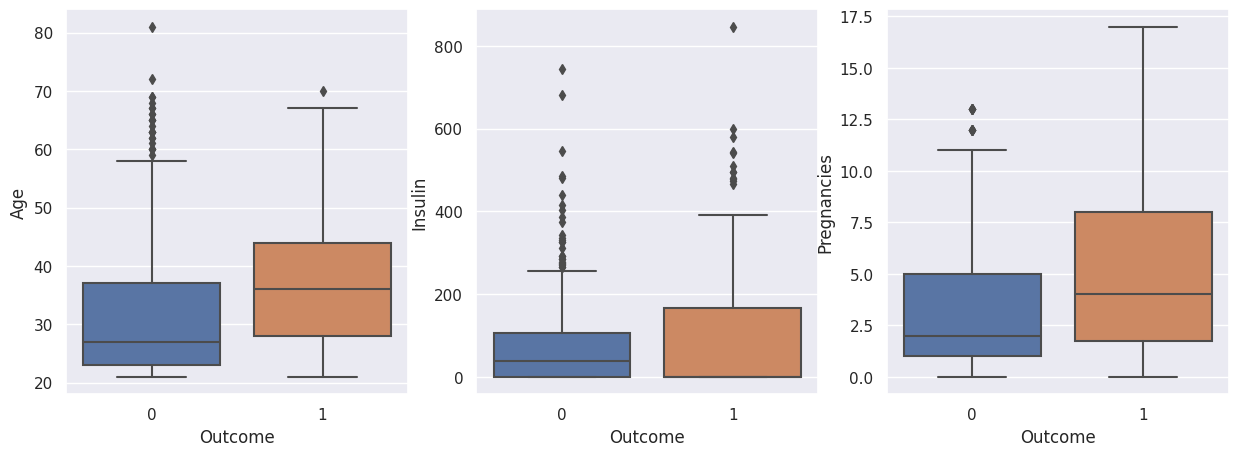

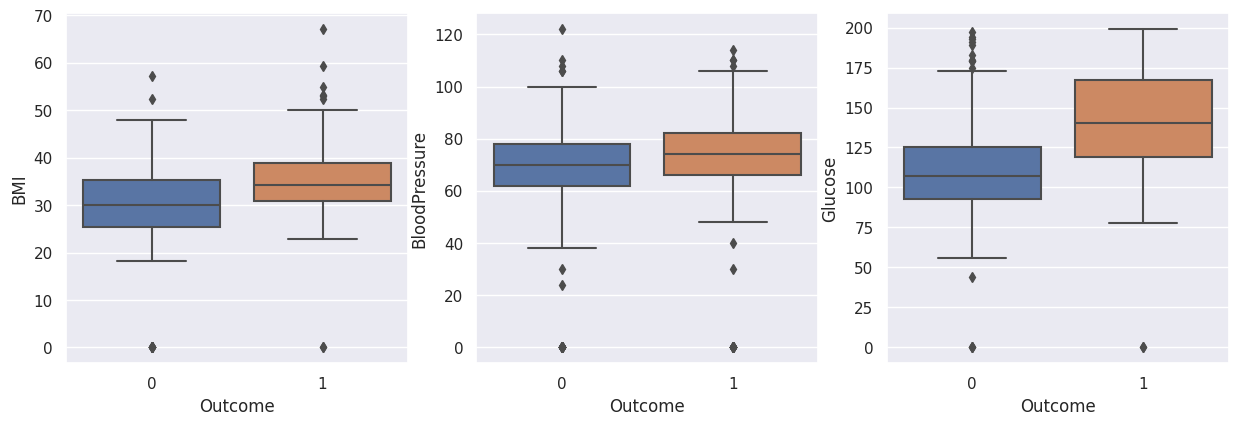

In [ ]:
plot_outliers()

In [ ]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
  quartile1 = dataframe[col_name].quantile(q1)
  quartile3 = dataframe[col_name].quantile(q3)
  interquantile_range = quartile3 - quartile1
  up_limit = quartile3 + 1.5 * interquantile_range
  low_limit = quartile1 - 1.5 * interquantile_range
  return low_limit, up_limit

In [ ]:
def check_outlier(dataframe, col_name):# eğer outlier_thresholds daki q1 ve q3 değerlerini değiştirmek istersek burada tanımlamamız lazım.
  low_limit, up_limit = outlier_thresholds(dataframe,col_name)
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
    return True
  else:
    return False

In [ ]:
for col in df.columns:
  print(col, check_outlier(df, col))

Pregnancies True
Glucose True
BloodPressure True
SkinThickness True
Insulin True
BMI True
DiabetesPedigreeFunction True
Age True
Outcome False


In [ ]:
outlier_cols = []
for col in df.columns:
  if check_outlier(df, col):
    outlier_cols.append(col)

In [ ]:
print(outlier_cols)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


##Adım 6: Eksik gözlem analizi yapınız.

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

##Adım 7: Korelasyon analizi yapınız.

In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


#Görev 2 : Feature Engineering

##Adım 1:  Eksik ve aykırı değerler için gerekli işlemleri yapınız. Veri setinde eksik gözlem bulunmamakta ama Glikoz, Insulin vb. değişkenlerde 0 değeri içeren gözlem birimleri eksik değeri ifade ediyor olabilir. Örneğin; bir kişinin glikoz veya insulin değeri 0 olamayacaktır. Bu durumudikkate alarak sıfır değerlerini ilgili değerlerde NaN olarak atama yapıp sonrasında eksik değerlere işlemleri uygulayabilirsiniz.

###Missing Values

In [ ]:
zero_cols = [col for col in df.columns if df[col].min() == 0 and col not in ["Pregnancies", "Outcome"]]

In [ ]:
print(zero_cols)

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']


In [ ]:
(df[zero_cols] == 0).sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [ ]:
df[df[zero_cols] == 0] = np.nan

In [ ]:
(df[zero_cols] == 0).sum()

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

In [ ]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
  (df.isnull().sum() / df.shape[0]*100).sort_values(ascending=False)

Insulin                     48.697917
SkinThickness               29.557292
BloodPressure                4.557292
BMI                          1.432292
Glucose                      0.651042
Pregnancies                  0.000000
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

In [ ]:
df = df.apply(lambda x: x.fillna(x.median()), axis = 0)

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.0000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.0000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


------
###Outliers

In [ ]:
for col in df.columns:
  print(col, check_outlier(df, col))

Pregnancies True
Glucose False
BloodPressure True
SkinThickness True
Insulin True
BMI True
DiabetesPedigreeFunction True
Age True
Outcome False


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


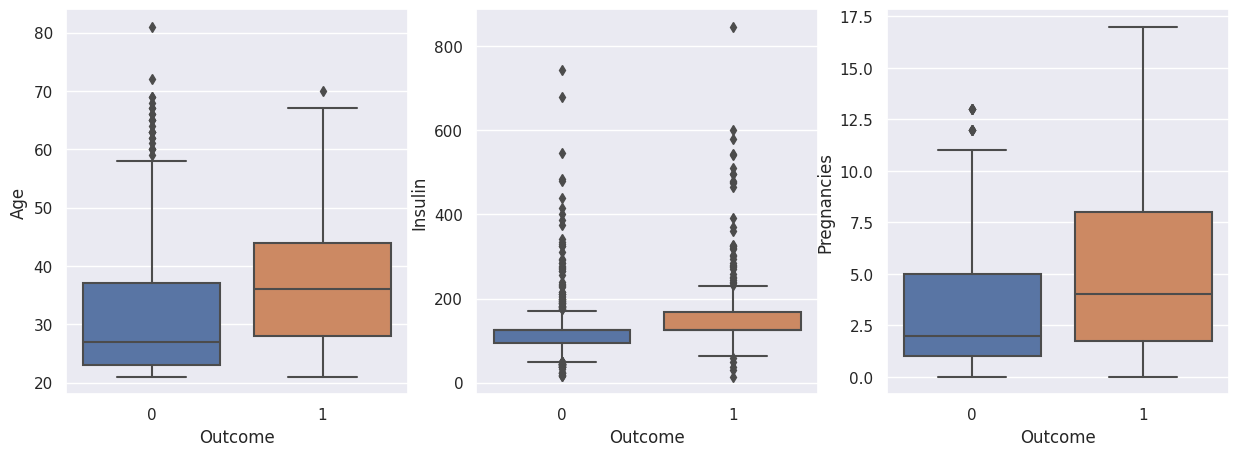

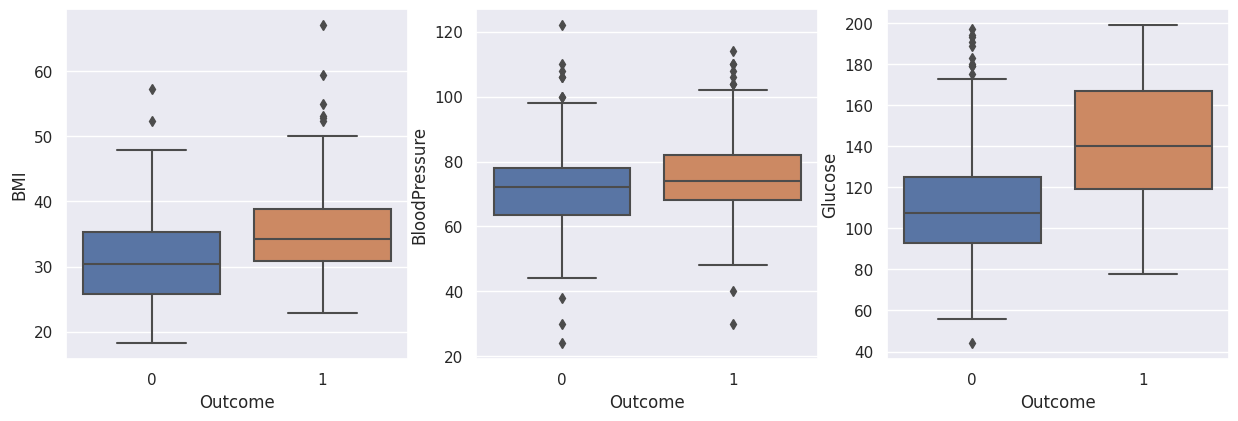

In [ ]:
plot_outliers()

In [ ]:
for col in df.columns:
  print(col, check_outlier(df, col))

Pregnancies True
Glucose False
BloodPressure True
SkinThickness True
Insulin True
BMI True
DiabetesPedigreeFunction True
Age True
Outcome False


In [ ]:
outlier_cols = []
for col in df.columns:
  if check_outlier(df, col):
    outlier_cols.append(col)

In [ ]:
print(outlier_cols)

['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [ ]:
def grab_outliers(dataframe, col_name, index=False):
  low, up = outlier_thresholds(dataframe, col_name)
  if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
    print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())

  else:
    print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

  if index:
    outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
    return outlier_index

In [ ]:
grab_outliers(df, "Insulin")

    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3             1     89.0           66.0           23.0     94.0  28.1   
4             0    137.0           40.0           35.0    168.0  43.1   
6             3     78.0           50.0           32.0     88.0  31.0   
8             2    197.0           70.0           45.0    543.0  30.5   
13            1    189.0           60.0           23.0    846.0  30.1   

    DiabetesPedigreeFunction  Age  Outcome  
3                      0.167   21        0  
4                      2.288   33        1  
6                      0.248   26        1  
8                      0.158   53        1  
13                     0.398   59        1  


In [ ]:
low, up = outlier_thresholds(df, "Insulin")

In [ ]:
df[((df["Insulin"] < low) | (df["Insulin"] > up))].shape

(346, 9)

In [ ]:
df.shape

(768, 9)

In [ ]:
def replace_with_thresholds(dataframe, col):
  low_limit, up_limit = outlier_thresholds(dataframe, col)
  dataframe.loc[(dataframe[col] < low_limit), col] = np.round(low_limit)
  dataframe.loc[(dataframe[col] > up_limit), col] = np.round(up_limit)

In [ ]:
for col in outlier_cols:
  replace_with_thresholds(df, col)

In [ ]:
for col in df.columns:
  print(col, check_outlier(df, col))

Pregnancies True
Glucose False
BloodPressure False
SkinThickness True
Insulin True
BMI False
DiabetesPedigreeFunction False
Age False
Outcome False


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.839844,3.351876,0.000,1.00000,3.0000,6.00000,14.000
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.000
BloodPressure,768.0,72.358073,11.697097,40.000,64.00000,72.0000,80.00000,104.000
SkinThickness,768.0,28.809896,7.435796,14.000,25.00000,29.0000,32.00000,42.000
Insulin,768.0,124.747396,7.911587,113.000,121.50000,125.0000,127.25000,136.000
BMI,768.0,32.390755,6.660532,18.200,27.50000,32.3000,36.60000,50.000
DiabetesPedigreeFunction,768.0,0.451362,0.267978,0.078,0.24375,0.3725,0.62625,1.191
Age,768.0,33.194010,11.611715,21.000,24.00000,29.0000,41.00000,66.000
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.000


##Adım 2: Yeni değişkenler oluşturunuz.

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,113.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,136.0,43.1,1.000,33,1


In [ ]:
araliklar = [18, 25, 30, 35,df["BMI"].max()]
df['BMI_Cat'] = pd.cut(df['BMI'], bins=araliklar, labels=["Under_weight", "Normal_Weight", "Over_weight", "Obese"])

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Cat
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,Over_weight
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,Normal_Weight
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,Under_weight
3,1,89.0,66.0,23.0,113.0,28.1,0.167,21,0,Normal_Weight
4,0,137.0,40.0,35.0,136.0,43.1,1.000,33,1,Obese


In [ ]:
df.loc[(df["Age"] <= 21), "Age_cat"] = "young"
df.loc[((df["Age"] > 21)& (df["Age"]<=40)), "Age_cat"] = "adult"
df.loc[(df["Age"] > 40), "Age_cat"] = "old"

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Cat,Age_cat
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,Over_weight,old
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,Normal_Weight,adult
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,Under_weight,adult
3,1,89.0,66.0,23.0,113.0,28.1,0.167,21,0,Normal_Weight,young
4,0,137.0,40.0,35.0,136.0,43.1,1.000,33,1,Obese,adult


In [ ]:
def find_quantile(df, col_name):
  low_q = df[col_name].quantile(0.25)
  up_q = df[col_name].quantile(0.75)
  return low_q, up_q

In [ ]:
cat_col_poss = ["BloodPressure", "Insulin"]

In [ ]:
for col in cat_col_poss:
  low_q, up_q = find_quantile(df, col)
  df[col+"_cat"] = ["Low" if value <= low_q else "Normal" if value > low_q and value < up_q else "High" for value in df[col]]

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Cat,Age_cat,BloodPressure_cat,Insulin_cat
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,Over_weight,old,Normal,Normal
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,Normal_Weight,adult,Normal,Normal
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,Under_weight,adult,Low,Normal
3,1,89.0,66.0,23.0,113.0,28.1,0.167,21,0,Normal_Weight,young,Normal,Low
4,0,137.0,40.0,35.0,136.0,43.1,1.000,33,1,Obese,adult,Low,High


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.839844,3.351876,0.000,1.00000,3.0000,6.00000,14.000
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.000
BloodPressure,768.0,72.358073,11.697097,40.000,64.00000,72.0000,80.00000,104.000
SkinThickness,768.0,28.809896,7.435796,14.000,25.00000,29.0000,32.00000,42.000
Insulin,768.0,124.747396,7.911587,113.000,121.50000,125.0000,127.25000,136.000
BMI,768.0,32.390755,6.660532,18.200,27.50000,32.3000,36.60000,50.000
DiabetesPedigreeFunction,768.0,0.451362,0.267978,0.078,0.24375,0.3725,0.62625,1.191
Age,768.0,33.194010,11.611715,21.000,24.00000,29.0000,41.00000,66.000
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.000


##Adım 3:  Encoding işlemlerini gerçekleştiriniz.

In [ ]:
cat_cols = [col for col in df.columns if 20 > df[col].nunique() >= 2]
cat_cols

['Pregnancies',
 'Insulin',
 'Outcome',
 'BMI_Cat',
 'Age_cat',
 'BloodPressure_cat',
 'Insulin_cat']

In [ ]:
cat_cols = [col for col in cat_cols if col not in ["Insulin", "Outcome"]]
cat_cols

['Pregnancies', 'BMI_Cat', 'Age_cat', 'BloodPressure_cat', 'Insulin_cat']

In [ ]:
def rare_analyser(dataframe, target, cat_cols):
  for col in cat_cols:
    print(col, ":", len(dataframe[col].value_counts()))
    print(pd.DataFrame({"COUNT":dataframe[col].value_counts(),
                        "Ratio":dataframe[col].value_counts() / len(dataframe),
                        "Target_Mean": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

In [ ]:
rare_analyser(df, "Outcome", cat_cols)

Pregnancies : 15
    COUNT     Ratio  Target_Mean
0     111  0.144531     0.342342
1     135  0.175781     0.214815
2     103  0.134115     0.184466
3      75  0.097656     0.360000
4      68  0.088542     0.338235
5      57  0.074219     0.368421
6      50  0.065104     0.320000
7      45  0.058594     0.555556
8      38  0.049479     0.578947
9      28  0.036458     0.642857
10     24  0.031250     0.416667
11     11  0.014323     0.636364
12      9  0.011719     0.444444
13     10  0.013021     0.500000
14      4  0.005208     1.000000


BMI_Cat : 4
               COUNT     Ratio  Target_Mean
Under_weight     112  0.145833     0.062500
Normal_Weight    180  0.234375     0.244444
Over_weight      232  0.302083     0.439655
Obese            244  0.317708     0.471311


Age_cat : 3
       COUNT     Ratio  Target_Mean
adult    511  0.665365     0.315068
old      194  0.252604     0.525773
young     63  0.082031     0.079365


BloodPressure_cat : 3
        COUNT     Ratio  Target_Mean
Hi

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    float64 
 2   BloodPressure             768 non-null    float64 
 3   SkinThickness             768 non-null    float64 
 4   Insulin                   768 non-null    float64 
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    int64   
 9   BMI_Cat                   768 non-null    category
 10  Age_cat                   768 non-null    object  
 11  BloodPressure_cat         768 non-null    object  
 12  Insulin_cat               768 non-null    object  
dtypes: category(1), float64(6), int64(3), object(3)
me

In [ ]:
df["Pregnancies"] = df["Pregnancies"].astype(str)

In [ ]:
def rare_encoder(dataframe, rare_perc):
  temp_df = dataframe.copy()

  rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == "O" and (temp_df[col].value_counts()/ len(temp_df) < rare_perc).any(axis=None)]# Rare sınıflara sahip olan feature lar seçildi

  for var in rare_columns:
    tmp = temp_df[var].value_counts() / len(temp_df)# Rare sınıf içeren ilgili featureların oranlarını alıyoruz. Burada örneğin tmp = Occupation_type değişkeni / feature ı olmuş oluyor
    rare_labels = tmp[tmp < rare_perc].index #bu occupation_type ın oranlarında belirlediğimiz eşik değerden altı olanları filtrele ve bunların idexlerini al.
    temp_df[var] = np.where(temp_df[var].isin(rare_labels), "Rare", temp_df[var])# numpy bize git bu değişken içerisinde bu indexlere sahip olanlar varmı bak var ise "Rare" yaz onların yerine yoksa aynı kalsın.

  return temp_df

In [ ]:
df = rare_encoder(df, 0.02)#0.001 bizim belirlediğimiz threshold. Bu değer altındakileri rare olarak seçicez.

In [ ]:
rare_analyser(df, "Outcome", cat_cols)

Pregnancies : 12
      COUNT     Ratio  Target_Mean
0       111  0.144531     0.342342
1       135  0.175781     0.214815
10       24  0.031250     0.416667
2       103  0.134115     0.184466
3        75  0.097656     0.360000
4        68  0.088542     0.338235
5        57  0.074219     0.368421
6        50  0.065104     0.320000
7        45  0.058594     0.555556
8        38  0.049479     0.578947
9        28  0.036458     0.642857
Rare     34  0.044271     0.588235


BMI_Cat : 4
               COUNT     Ratio  Target_Mean
Under_weight     112  0.145833     0.062500
Normal_Weight    180  0.234375     0.244444
Over_weight      232  0.302083     0.439655
Obese            244  0.317708     0.471311


Age_cat : 3
       COUNT     Ratio  Target_Mean
adult    511  0.665365     0.315068
old      194  0.252604     0.525773
young     63  0.082031     0.079365


BloodPressure_cat : 3
        COUNT     Ratio  Target_Mean
High      205  0.266927     0.439024
Low       201  0.261719     0.228856
N

In [ ]:
#def label_encoder(dataframe, col):
#  le = LabelEncoder()
#  dataframe[col] = le.fit_transform(dataframe[col])
#  return dataframe

In [ ]:
#for col in cat_cols:
#  df = label_encoder(df, col)

In [ ]:
def one_hot_encoder(dataframe, cols):
  dataframe = pd.get_dummies(dataframe, columns = cols, drop_first = True)
  return dataframe

In [ ]:
ohe_cols = [col for col in df.columns if 15 > df[col].nunique() >= 2]
ohe_cols

['Pregnancies',
 'Outcome',
 'BMI_Cat',
 'Age_cat',
 'BloodPressure_cat',
 'Insulin_cat']

In [ ]:
ohe_cols = [col for col in ohe_cols if col not in "Outcome"]

In [ ]:
ohe_cols

['Pregnancies', 'BMI_Cat', 'Age_cat', 'BloodPressure_cat', 'Insulin_cat']

In [ ]:
df = one_hot_encoder(df, ohe_cols)

In [ ]:
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_1,Pregnancies_10,Pregnancies_2,Pregnancies_3,Pregnancies_4,Pregnancies_5,Pregnancies_6,Pregnancies_7,Pregnancies_8,Pregnancies_9,Pregnancies_Rare,BMI_Cat_Normal_Weight,BMI_Cat_Over_weight,BMI_Cat_Obese,Age_cat_old,Age_cat_young,BloodPressure_cat_Low,BloodPressure_cat_Normal,Insulin_cat_Low,Insulin_cat_Normal
0,148.0,72.0,35.0,125.0,33.6,0.627,50,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1
1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
2,183.0,64.0,29.0,125.0,23.3,0.672,32,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
3,89.0,66.0,23.0,113.0,28.1,0.167,21,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0
4,137.0,40.0,35.0,136.0,43.1,1.000,33,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


##Adım 4: Numerik değişkenler için standartlaştırma yapınız.

In [ ]:
num_cols

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [ ]:
cat_cols

['Pregnancies', 'BMI_Cat', 'Age_cat', 'BloodPressure_cat', 'Insulin_cat']

In [ ]:
ss = StandardScaler()
df[num_cols] = ss.fit_transform(df[num_cols])

In [ ]:
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_1,Pregnancies_10,Pregnancies_2,Pregnancies_3,Pregnancies_4,Pregnancies_5,Pregnancies_6,Pregnancies_7,Pregnancies_8,Pregnancies_9,Pregnancies_Rare,BMI_Cat_Normal_Weight,BMI_Cat_Over_weight,BMI_Cat_Obese,Age_cat_old,Age_cat_young,BloodPressure_cat_Low,BloodPressure_cat_Normal,Insulin_cat_Low,Insulin_cat_Normal
0,0.866045,-0.030632,0.833016,0.031949,0.181672,0.655846,1.448274,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1
1,-1.205066,-0.543914,0.025583,0.031949,-0.869980,-0.374759,-0.189071,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
2,2.016662,-0.715008,0.025583,0.031949,-1.365759,0.823879,-0.102895,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
3,-1.073567,-0.543914,-0.781851,-1.485802,-0.644626,-1.061829,-1.050832,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0
4,0.504422,-2.768136,0.833016,1.423221,1.608914,2.048656,-0.016719,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


##Adım 5: Model oluşturunuz.

In [ ]:
y = df["Outcome"]
x = df.drop("Outcome", axis = 1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 0)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_pred = rf_model.predict(x_test)
accuracy_score(y_pred, y_test)

0.8051948051948052

In [ ]:
#Yeni ürettiğimiz değişkenlerin durumları:
def plot_importance(model, features, num = len(x), save = False):
  feature_imp = pd.DataFrame({"Value":model.feature_importances_, "Feature": features.columns})
  plt.figure(figsize=(10,10))
  sns.set(font_scale=1)
  sns.barplot(x = "Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])

  plt.title("Features")
  plt.tight_layout()
  plt.show()
  if save:
    plt.savefig("importances.png")



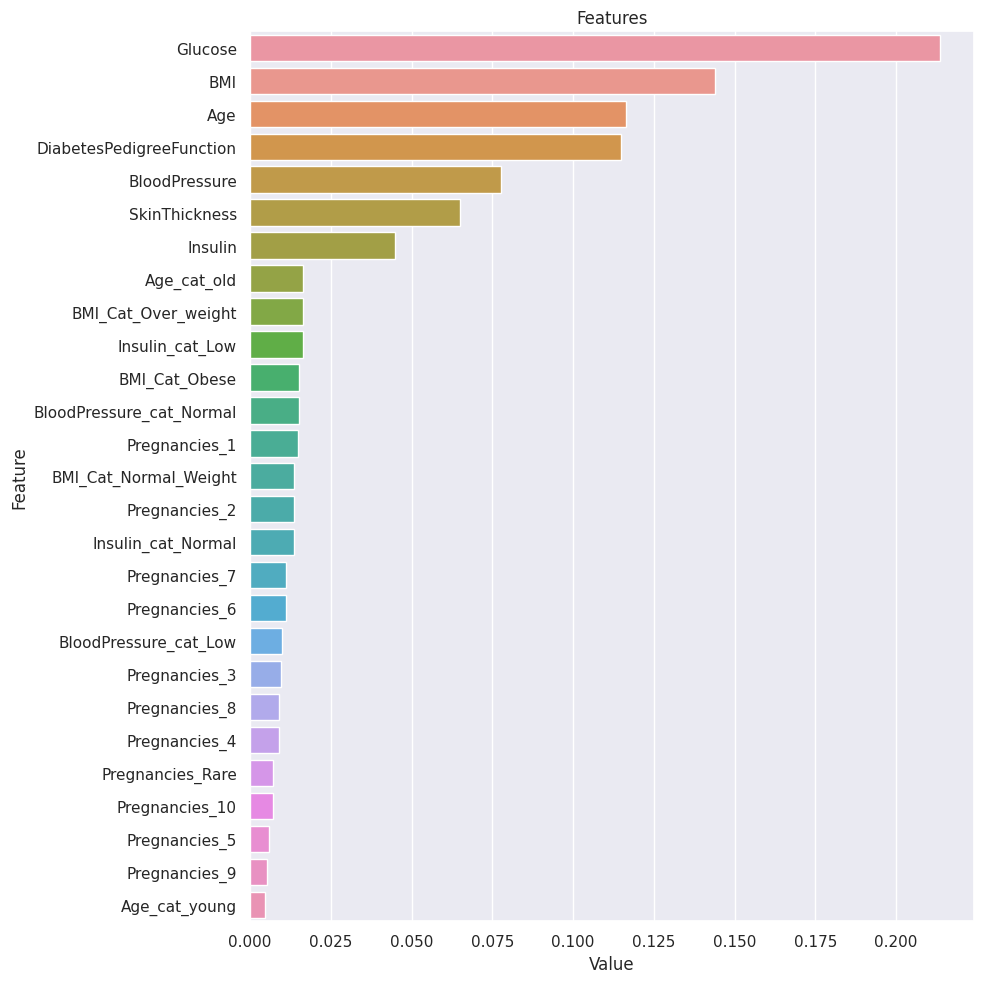

In [ ]:
plot_importance(rf_model, x_train)